In [1]:
#US Accidents Exploratory Data Analysis

In [25]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [3]:
df = pd.read_csv('\Databases\EDA Project\US_Accidents_Dec21_updated.csv')

In [4]:
print(df.head())

    ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2    

In [5]:
#Data Preparation and Cleaning

In [26]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [27]:
len(df)

2845342

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [30]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [31]:
#Find the Numeric Columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include = numerics)
len(numeric_df.columns)

14

In [32]:
#Find Missing Values

df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [33]:
#Percentage of Missing Values per Column

missing_percentages = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

<AxesSubplot: >

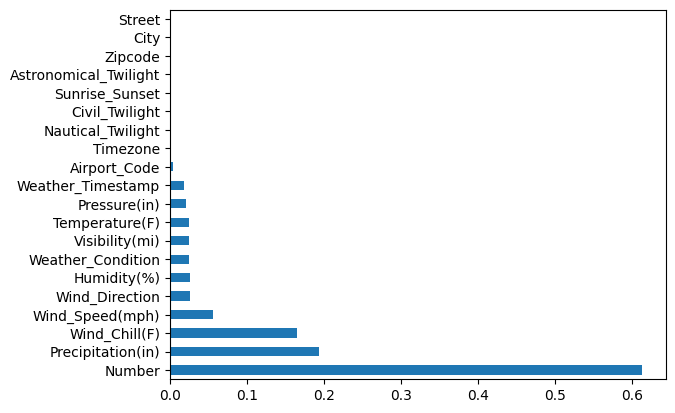

In [34]:
#Removing null values and Plot them

missing_percentages[missing_percentages !=0].plot(kind='barh')

In [35]:
#Choise of columns to analyze

cities = df.City.unique()
len(cities)

11682

In [36]:
#Top 10 Cities by Accident


cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

<AxesSubplot: >

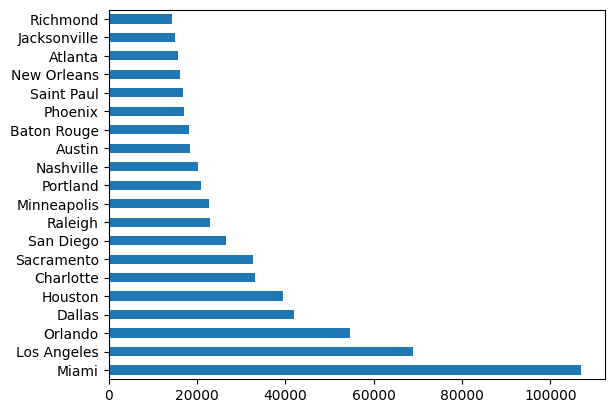

In [37]:
#Plot the top 20 cities by accident

cities_by_accident[:20].plot(kind='barh')

<AxesSubplot: xlabel='City', ylabel='Count'>

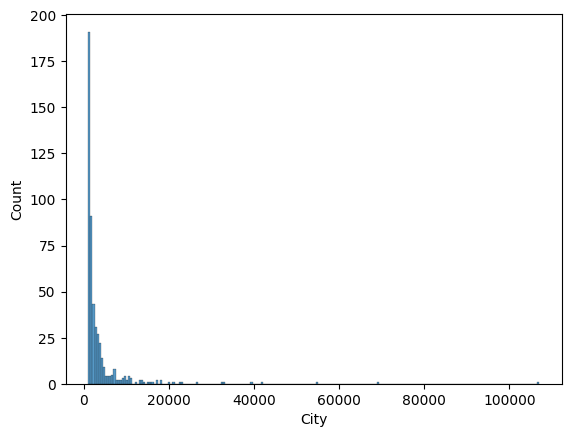

In [40]:
#Plot the top 500 cities by accident

sns.histplot(cities_by_accident[:500])

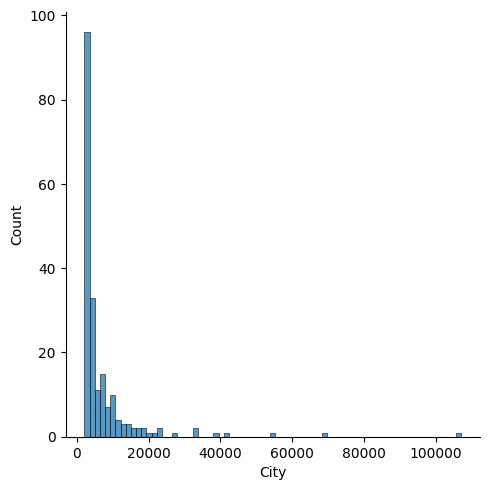

In [41]:
#Plot the top 200 cities by accident

sns.displot(cities_by_accident[:200])

In [24]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [25]:
#Cities with high number of accidents vs low number of accidents

print(len(high_accident_cities))
print(len(low_accident_cities))

496
11185


In [26]:
#Less than 5% of the cities have more than 1000 accidents

print(len(high_accident_cities) / len(cities))
print(len(low_accident_cities) / len(cities))

0.04245848313644924
0.9574559150830337


<AxesSubplot: xlabel='City', ylabel='Count'>

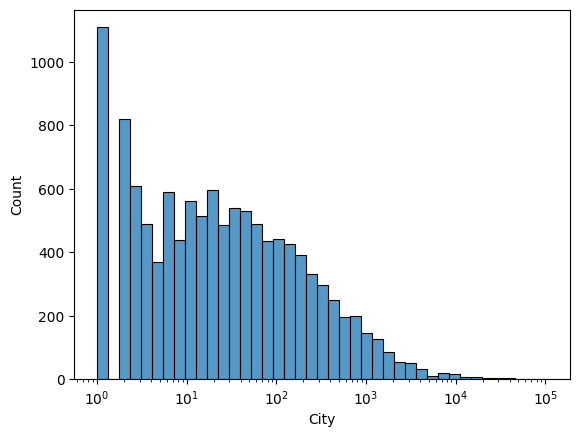

In [30]:
sns.histplot(cities_by_accident, log_scale = True)

In [33]:
#1110 Cities reported only one accident, possibly false.

cities_by_accident[cities_by_accident == 1 ]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

In [37]:
#Convert the DateTime into a timestamp

df.Start_Time = pd.to_datetime(df.Start_Time)

<AxesSubplot: xlabel='Start_Time', ylabel='Count'>

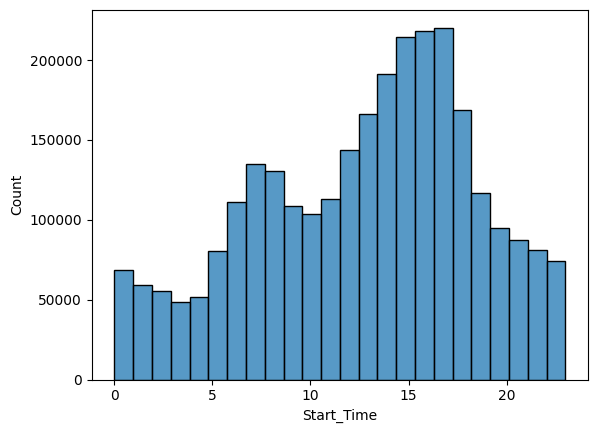

In [49]:
#Most accidents seem to happen in the middle of the day. 15:00-17:00

sns.histplot(df.Start_Time.dt.hour, bins=24)

<AxesSubplot: xlabel='Start_Time', ylabel='Count'>

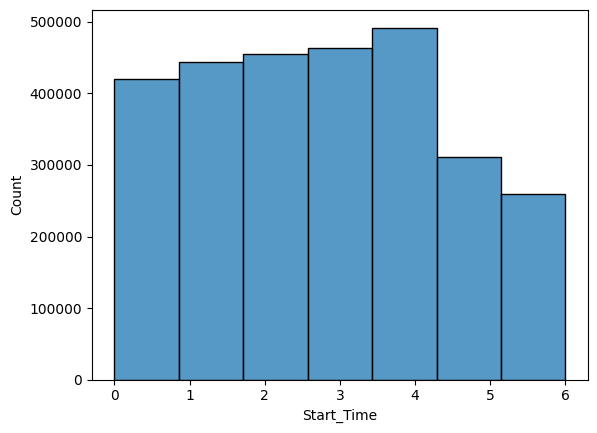

In [51]:
#Most of the accidents happens during the weekdays

sns.histplot(df.Start_Time.dt.dayofweek, bins=7)

<AxesSubplot: xlabel='Start_Time', ylabel='Count'>

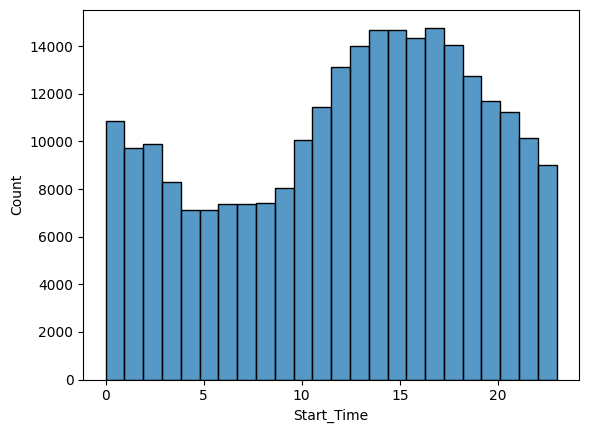

In [54]:
#In Sundays the distribution seem to be more spread out, there are a lot of accidents also in the first morning hours.
#Probably after a Saturday night out.

sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.hour , bins =24)

<AxesSubplot: xlabel='Start_Time', ylabel='Count'>

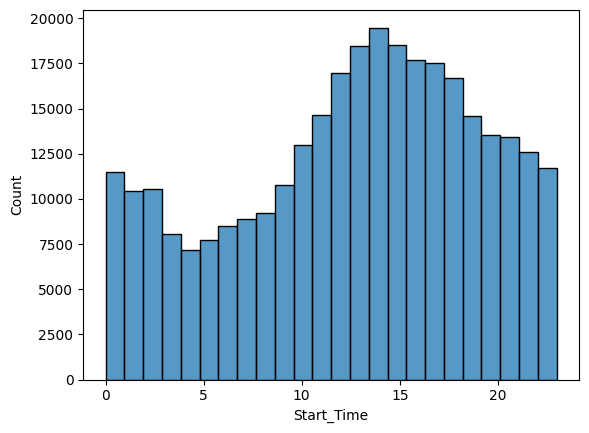

In [61]:
#In Saturdays the distribution also seems more spread out but there are less accident during the first morning hours.

saturday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.histplot(saturday_start_time.dt.hour , bins =24)

<AxesSubplot: xlabel='Start_Time', ylabel='Count'>

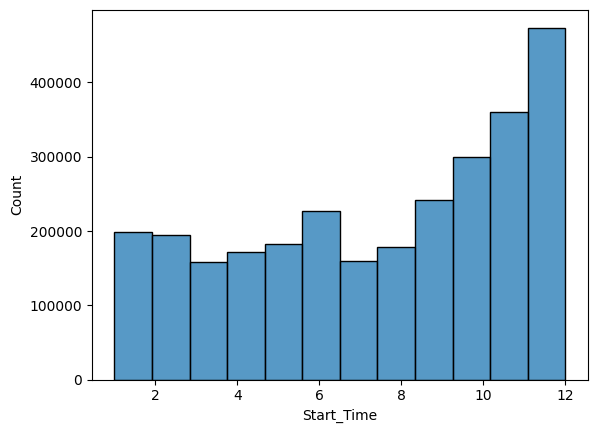

In [67]:
#There seem to be way more accidents during the last months of the year. 

sns.histplot(df.Start_Time.dt.month, bins=12)

<AxesSubplot: xlabel='Start_Time', ylabel='Count'>

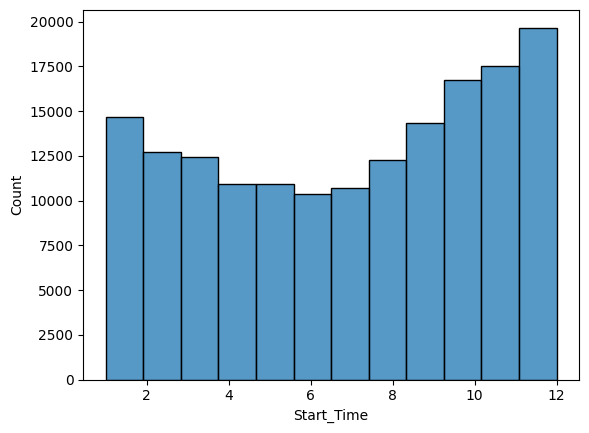

In [73]:
#The trend seem to be clear also in the 2018 data. 

df_2018 = df[df.Start_Time.dt.year == 2018]
sns.histplot(df_2018.Start_Time.dt.month, bins=12)

<AxesSubplot: xlabel='Start_Time', ylabel='Count'>

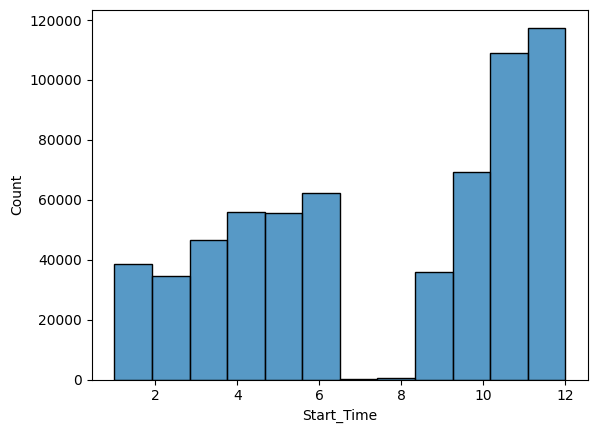

In [75]:
#There is clearly some problem with the data from 2020. Which afects our overall data 

df_2020 = df[df.Start_Time.dt.year == 2020]
sns.histplot(df_2020.Start_Time.dt.month, bins=12)

<AxesSubplot: xlabel='Start_Time', ylabel='Count'>

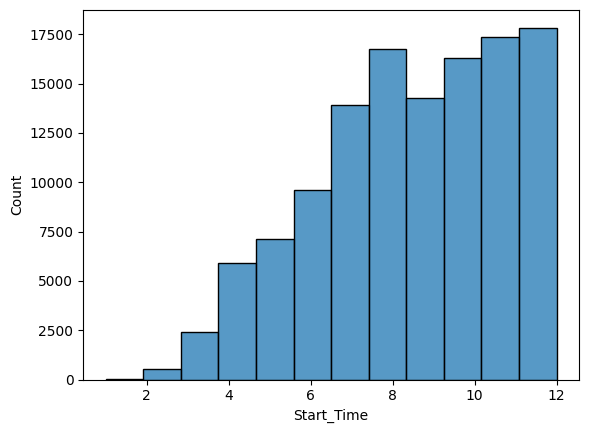

In [78]:
#2016 data seems to have a differt issue on the months of the year. Also afecting the overall results  

df_2016 = df[df.Start_Time.dt.year == 2016]
sns.histplot(df_2016.Start_Time.dt.month, bins=12)

<AxesSubplot: xlabel='Start_Time', ylabel='Count'>

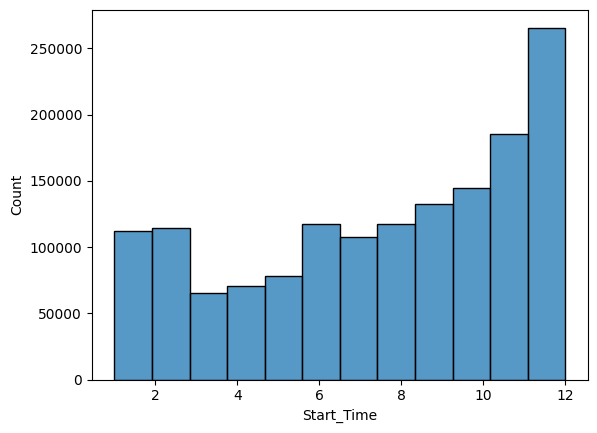

In [84]:
#There is also the effect of the quarantines.

df_2021 = df[df.Start_Time.dt.year == 2021]
sns.histplot(df_2021.Start_Time.dt.month, bins=12)